# Visualizing Statistical Relationships

Seaborn is a powerful Python library built on top of matplotlib that simplifies the creation of statistical graphics. With its high-level, dataset-oriented API and seamless integration with pandas, Seaborn allows users to quickly explore relationships in data, estimate trends, and visualize distributions with minimal code. It offers smart defaults and flexible customization, making it ideal for both exploratory analysis and polished visualizations.

Seaborn tutorial (https://seaborn.pydata.org/tutorial/relational.html)

Overview of seaborn plotting functions (https://seaborn.pydata.org/tutorial/function_overview.html)

## Installing and Importing Packages

In [ ]:
# Importing the neccessary packages
%pip install numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.__version__

## Relating Variables with Scatter Plot

A **scatter plot** is a fundamental way to visualize the relationship between two continuous variables. Each point on the plot represents an observation, positioned according to its values on the x- and y-axes. Scatter plots help reveal correlations, clusters, or outliers in data, showing trends or patterns that may exist between variables.

In Seaborn, functions like `sns.scatterplot()` or `sns.relplot()` are commonly used to create scatter plots, often enhanced by additional semantic variables such as `hue` (color), `size`, or `style` to represent more dimensions of data.


This code begins by setting the overall visual style of Seaborn plots to `"darkgrid"`, which adds a grid to the background to make the plot easier to read. It then loads Seaborn’s built-in `tips` dataset, which contains information about restaurant bills and tips. Finally, it creates a scatter plot using `sns.lmplot()` to visualize the relationship between `total_bill` and `tip`. Setting `fit_reg=False` disables the default linear regression line, allowing us to focus solely on the raw data points.


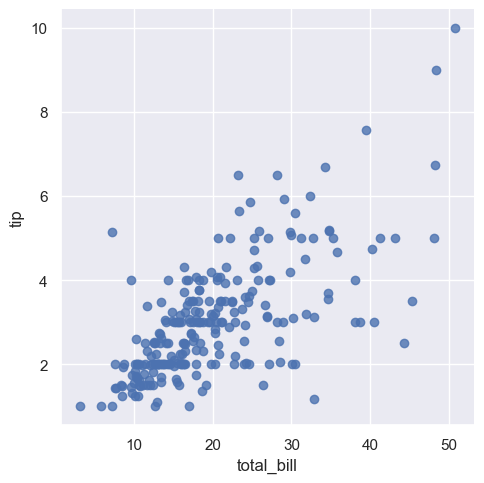

In [ ]:


sns.set(style="darkgrid") #style = dict, None, or one of {darkgrid, whitegrid, dark, white, ticks} --- style of axes

tips = sns.load_dataset("tips") #Load an example dataset from the online repository (requires internet)
sns.lmplot(x="total_bill", y="tip", fit_reg=False, data=tips); # semicolon(;) at the end stops the graph text to be printed

This code sets a clean white background using `sns.set(style="white")`, then creates a scatter plot showing the relationship between `total_bill` and `tip` using Seaborn’s `lmplot()`. Another dimension is added to the plot through the `hue` semantic—coloring points based on the `smoker` variable—so we can visually compare tipping behavior between smokers and non-smokers. The regression line is turned off with `fit_reg=False`, so the plot displays only the raw data points. By default, Seaborn sets the figure size, but you can manually adjust it using the `height` and `aspect` parameters. You can also change the size of the data points using the `s` parameter in other Seaborn functions like `scatterplot()`.


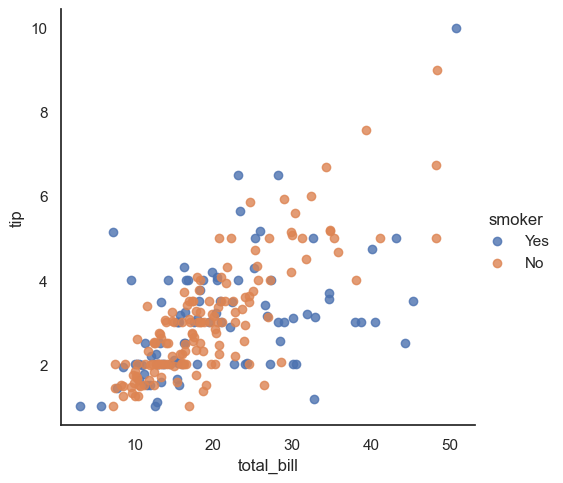

In [5]:
sns.set(style="white")
sns.lmplot(x="total_bill", y="tip", hue="smoker", fit_reg=False,data=tips);

This code uses Matplotlib’s `plt.figure(figsize=(8, 10))` to manually set the size of the figure, demonstrating another way to control plot dimensions outside of Seaborn. It then creates a scatter plot of `total_bill` vs. `tip` using Seaborn’s `lmplot()`, with data points colored by the `smoker` category using the `hue` semantic. To better highlight group differences and improve accessibility, you can also use different marker styles for each class by adding the `markers` parameter (e.g., `markers=["o", "s"]`). While `lmplot()` has its own size controls (`height` and `aspect`), this example shows how Matplotlib can also be used to control figure appearance.

<Figure size 800x1000 with 0 Axes>

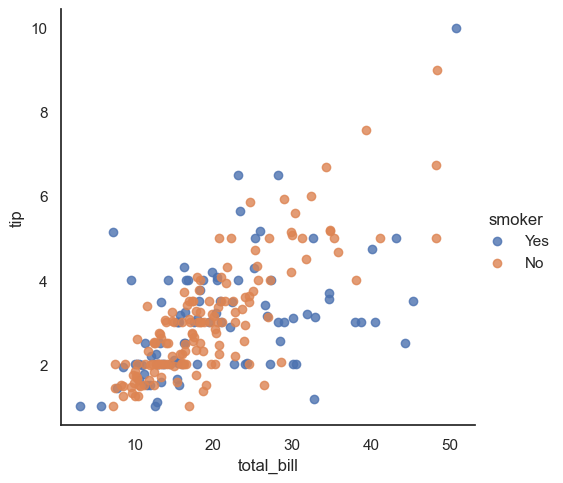

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,10))
sns.lmplot(x="total_bill", y="tip", hue="smoker", fit_reg=False, data=tips);

This code uses `sns.relplot()` to create a scatter plot showing the relationship between `total_bill` and `tip`, while simultaneously representing two additional variables. The `hue="smoker"` parameter colors the points based on smoking status, and `style="time"` changes the marker shape depending on whether the meal was during lunch or dinner. This allows the plot to display four variables at once. However, this should be done carefully—while color is visually striking and easy to interpret, the human eye is less sensitive to differences in shape, so subtle distinctions may be harder to spot.

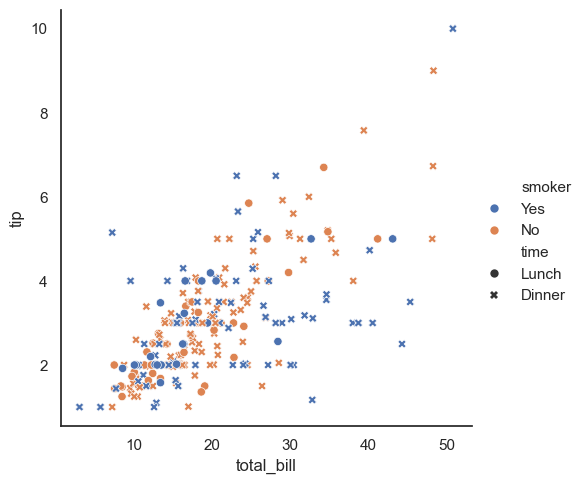

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In the examples above, `sns.scatterplot()` is used to plot `total_bill` vs. `tip`, with point colors (`hue`) based on the `size` of the dining party. Since `size` is a numeric variable, Seaborn automatically uses a **sequential color palette**, where lighter and darker colors represent smaller and larger values. This is different from when `hue` is categorical—like `sex` or `smoker`—in which case Seaborn uses a **qualitative palette** by default.

The second plot shows how to manually change the color palette using the `palette` parameter. Here, the `"coolwarm"` palette is used, which makes differences in group size more visually distinct. Adjusting color palettes can help improve clarity, especially when working with numeric hue semantics.


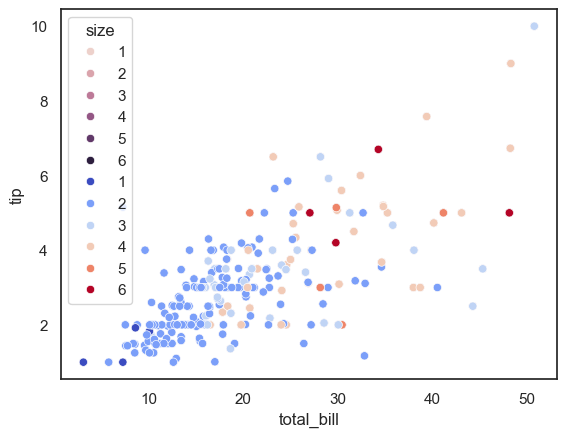

In [8]:
sns.scatterplot(x="total_bill", y="tip", hue="size", data=tips);

#changing the color palette
sns.scatterplot(x="total_bill", y="tip", hue="size", palette="coolwarm", data=tips);

This code uses `sns.relplot()` to create a scatter plot where the size of each point is determined by the `size` variable, adding a third semantic dimension to the plot. Instead of using the raw numeric values directly as point sizes, Seaborn **normalizes** the range of `size` values into an area range for the plot markers.

In the second example, the `sizes=(15, 200)` parameter customizes this area range, specifying that points will have sizes scaled between 15 and 200 (in area units), which can help make differences in data more visually distinct. This semantic mapping of size is a powerful way to encode numeric information in scatter plots.


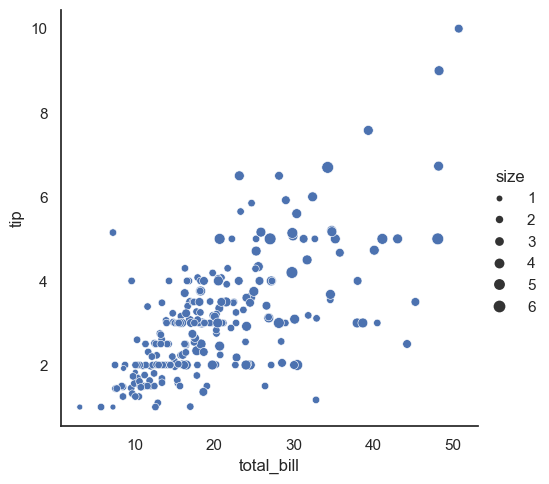

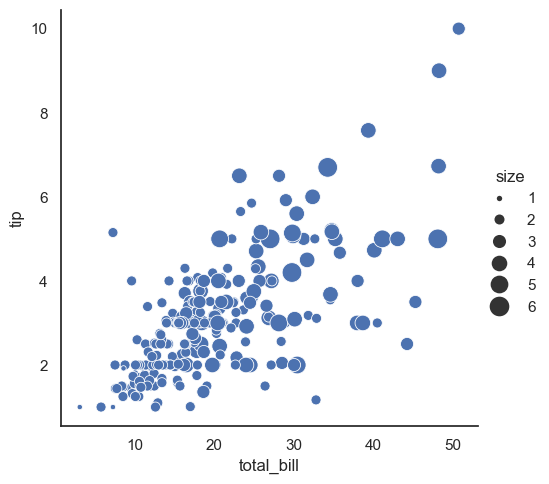

In [9]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

#the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is
#normalized into a range in area units. This range can be customized:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);


This plot combines multiple semantic variables using `sns.relplot()`. Both the color (`hue`) and the size of the points represent the `size` variable, giving two visual cues to its values. The color palette `"BuGn_r"` (a reversed blue-green sequential palette) is used to emphasize this numeric variable, while `sizes=(30, 200)` controls the range of marker areas. Setting `legend="full"` ensures the legend shows the full range of sizes and colors, making it easier to interpret how `size` relates to `total_bill` and `tip`.


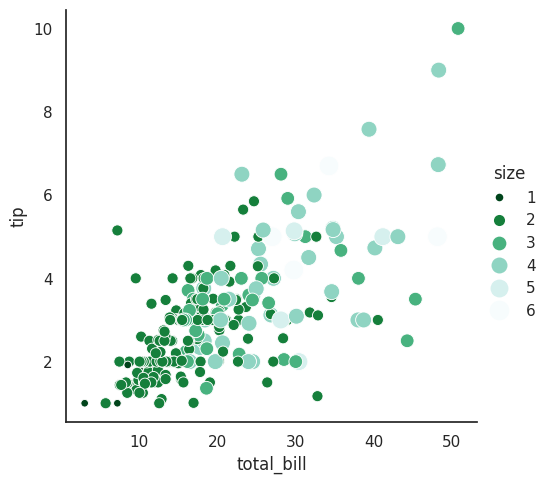

In [11]:

sns.relplot(x="total_bill", y="tip", hue="size", size="size", palette = ("BuGn_r"),
                     sizes=(30, 200), legend="full" ,data=tips)

## Pairwise plots

**Pairwise plots** are a convenient way to visualize relationships between multiple variables at once. Using Seaborn’s `pairplot()`, you can create a grid of scatter plots showing every pairwise combination of numerical variables in a dataset, along with histograms or KDE plots on the diagonal to display each variable’s distribution. This helps quickly spot correlations, patterns, or clusters across variables.


### FacetGrid

**Facet Grids** are powerful tools for visualizing data subsets across different categories. They allow you to split your dataset into multiple smaller plots (facets), arranged by one or more categorical variables. A `FacetGrid` can organize these plots by **rows**, **columns**, and additionally use **hue** for color coding, effectively creating up to three dimensions of categorization.

Each facet shows the distribution or relationships for the subset of data corresponding to a specific category or combination of categories. This helps reveal patterns or differences that might be hidden in the overall dataset.


This code creates a **FacetGrid** using the `tips` dataset, splitting the data into separate plots based on the `time` variable (e.g., lunch or dinner). For each subset, it maps a histogram of the `tip` variable, allowing you to compare the distribution of tips between different meal times side-by-side. The function `plt.hist` from Matplotlib is used to generate these histograms—it takes the `tip` data for each facet and plots its frequency distribution as bars. This visual separation helps identify differences in tipping behavior depending on the time of day.


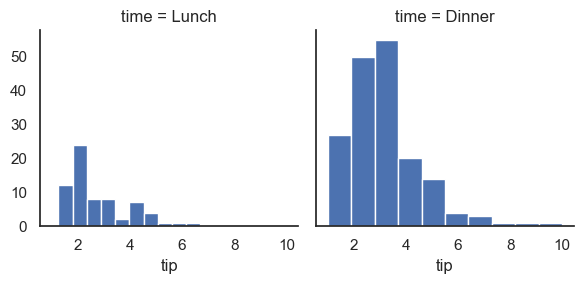

In [10]:
#sns.set(style="white")
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

This code creates a **FacetGrid** that divides the `tips` dataset into separate plots based on the `time` variable (`col="time"`), producing one plot for lunch and one for dinner. Within each plot, points are colored by the `smoker` status using the `hue` semantic, with the `"husl"` color palette for clear distinction. It uses `plt.scatter` to map a scatter plot of `total_bill` versus `tip` on each facet, with some transparency (`alpha=.7`) and white edges around points for better visibility. The `add_legend()` call adds a legend explaining the smoker categories. This visualization helps compare tipping behavior across meal times and smoking status simultaneously.


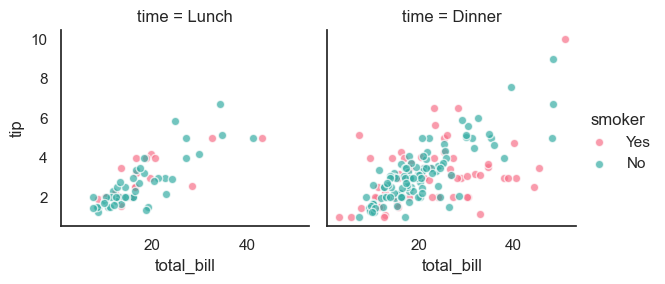

In [11]:

g = sns.FacetGrid(tips, col="time", hue="smoker", palette="husl")
g.map(plt.scatter, "total_bill", "tip", alpha=.7, edgecolor ="w")
g.add_legend();

This line loads the famous **Iris** dataset using Seaborn’s built-in dataset loader. The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers, making it a classic example for practicing data visualization and classification tasks.

In [12]:
iris= sns.load_dataset("iris")

This code outputs the column names of the `iris` DataFrame, showing the variables available in the dataset—such as measurements of flower parts and the species label.

In [13]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

This line creates a **pair plot** of the `iris` dataset, plotting all pairwise combinations of numerical features. The `hue="sepal_length"` argument colors the data points based on their sepal length values, but since `sepal_length` is a continuous variable, Seaborn applies a **sequential color palette** to represent its values.


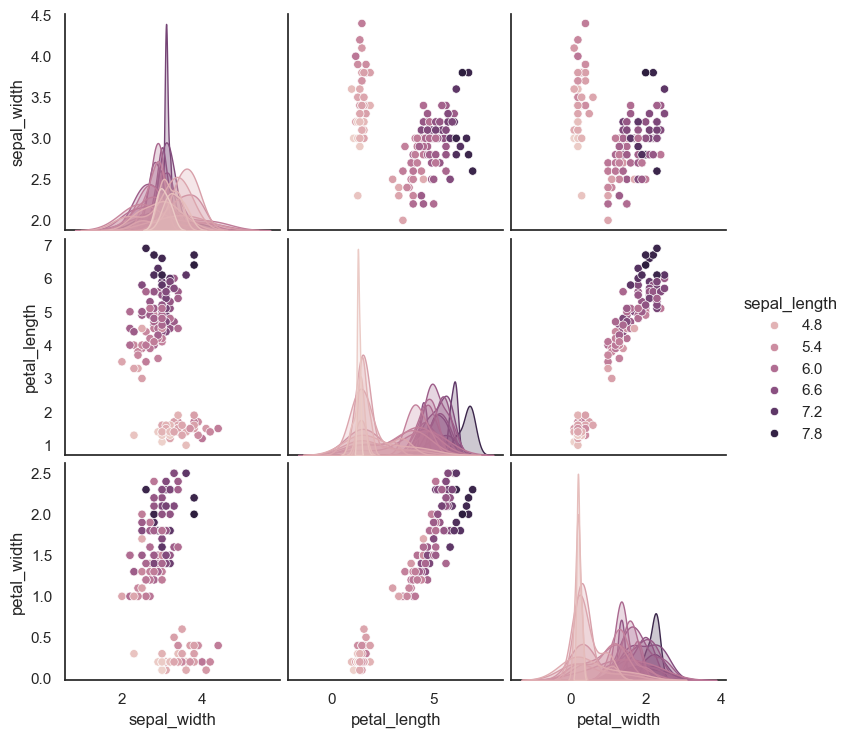

In [14]:
sns.pairplot(iris, hue="sepal_length", height=2.5);

### Pairgrid

A **PairGrid** is a flexible way to create a grid of subplots that shows **pairwise relationships** in a dataset. Unlike `pairplot()`, which is a quick, high-level function, `PairGrid` offers **more control** over how plots are drawn on the diagonal, upper, and lower parts of the grid. You can customize each section with different kinds of plots (e.g., histograms, scatter plots, KDEs) using `.map()`, `.map_diag()`, and `.map_upper()`/`.map_lower()`.

This makes `PairGrid` especially useful when you want to tailor the appearance or behavior of pairwise plots beyond the defaults of `pairplot()`.


This code creates a **PairGrid** using the `iris` dataset, with points colored by the `petal_length` variable. Since `petal_length` is continuous, Seaborn applies a **sequential version** of the `"husl"` color palette to represent the range of values. The `g.map(plt.scatter, edgecolor="w")` line maps a scatter plot to every pairwise combination of numeric variables in the dataset, using white edges around the points to improve contrast and visibility. This customized PairGrid gives you fine control over how each subplot is rendered, compared to the simpler `pairplot()` function.


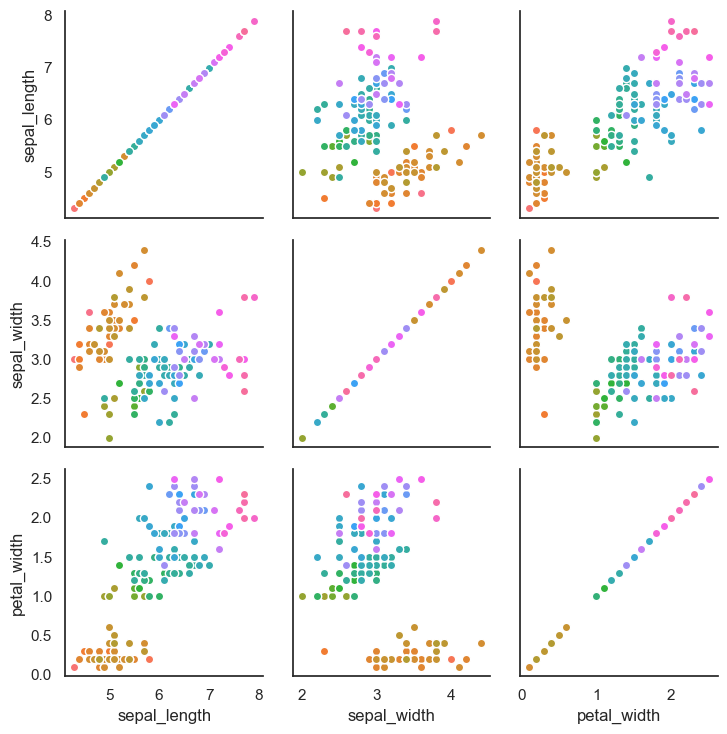

In [15]:
g = sns.PairGrid(iris, hue="petal_length", palette = ("husl"));
g.map(plt.scatter, edgecolor="w");

## Heatmaps

A **heatmap** is a two-dimensional graphical representation of data where the individual values in a matrix or DataFrame are represented as colors. Each cell in the grid corresponds to a value, and its color indicates the magnitude—typically using hue, intensity, or both. This makes heatmaps especially useful for visualizing patterns, clusters, correlations, or missing data in a dataset.

The variation in color provides quick visual cues to help the reader understand how values are distributed or grouped, making complex data more interpretable at a glance.


This code creates a **heatmap** to visualize airline passenger counts over time using Seaborn's built-in `flights` dataset. First, the data is reshaped using `.pivot()` so that months form the rows, years form the columns, and passenger numbers fill the matrix values.

The `sns.heatmap(flights)` call generates a color-coded grid where each cell’s color represents the number of passengers for a given month and year. This makes it easy to spot seasonal trends and changes over time. The plot is displayed inside a Matplotlib figure sized at 8 by 6 inches.

You can customize the color scheme with the `cmap` parameter (e.g., `cmap="rocket_r"` for a reversed rocket palette), and control tick label orientation with `ax.tick_params(axis='x', labelrotation=90)`.

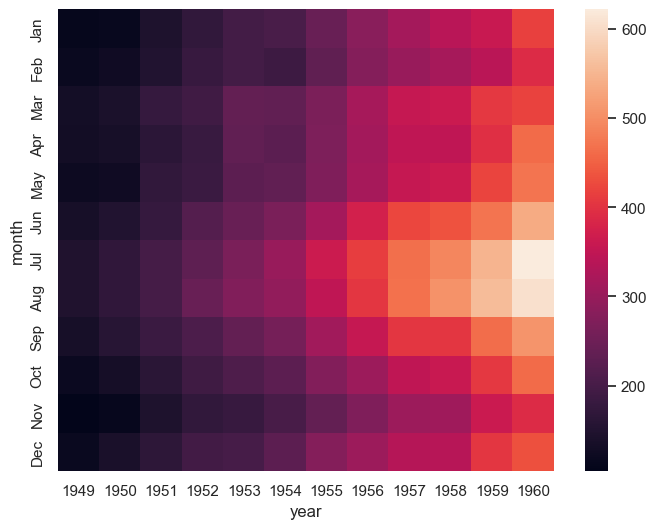

In [28]:
 # Heatmap with default seaborn settings
plt.figure(figsize=(8,6))

flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers")
ax = sns.heatmap(flights) # Returns ax, a matplotlib axes
# ax  = sns.heatmap(flights, cmap="rocket_r") # Reversed color palette

#ax.tick_params(axis = 'x', labelrotation=90)

This code creates a more detailed **heatmap** using the `flights` dataset. The color palette is set to `"YlGnBu"` (yellow-green-blue), which is suitable for representing increasing values. The `linewidths=.5` argument adds thin lines between the cells to improve readability.

The `annot=True` parameter displays the actual passenger counts in each cell, and `fmt="d"` formats those numbers as integers. Together, these additions make it easier to interpret exact values while still benefiting from the overall color-based visualization.


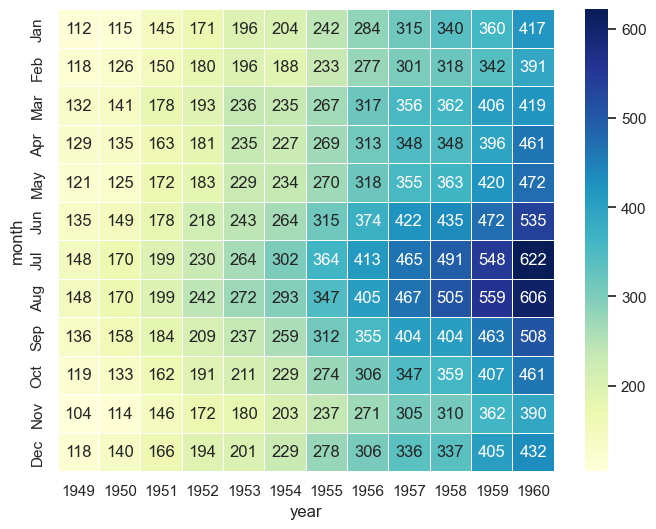

In [30]:
# Changing color palette, adding space between each square, adding values etc
plt.figure(figsize=(8,6))
sns.heatmap(flights, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d");

## Boxplots

A **boxplot** (or box-and-whisker plot) is a standardized way of displaying the distribution of a dataset based on five summary statistics: the **minimum**, **first quartile (Q1)**, **median (Q2)**, **third quartile (Q3)**, and **maximum**. It also highlights **outliers**—points that fall significantly outside the typical range.

Boxplots are useful for comparing distributions across different categories. In Seaborn, you can create them easily with `sns.boxplot()`. The central box shows the interquartile range (IQR), the line inside the box is the median, and the "whiskers" extend to the lowest and highest values within 1.5×IQR. Any points beyond that are plotted individually as outliers.



This code loads the `tips` dataset and creates a **boxplot** of the `total_bill` variable. The boxplot summarizes the distribution of total bills by displaying the median, quartiles, and potential outliers. This visualization helps quickly understand the spread and skewness of the billing amounts in the dataset.


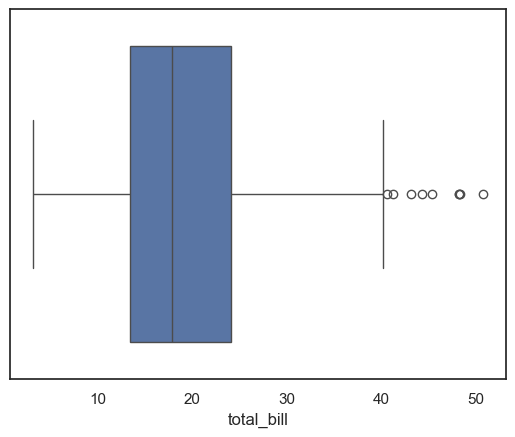

In [29]:
# load data using pandas dataframes
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

This code creates a **boxplot** showing the distribution of `total_bill` amounts for each day of the week in the `tips` dataset. By grouping the data by the `day` variable on the x-axis, it allows for easy comparison of billing patterns across different days. Each box displays the median, quartiles, and potential outliers for the total bill amounts on that day.


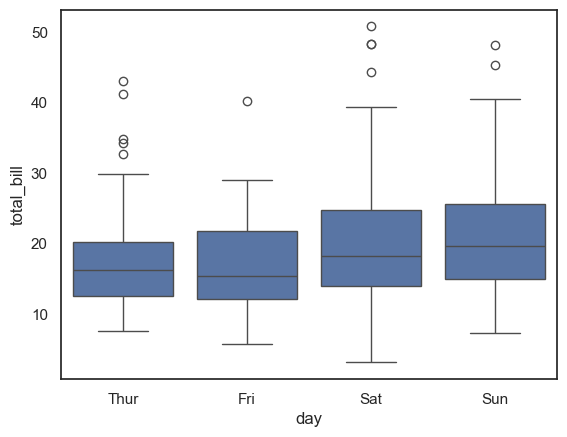

In [31]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

This code creates a **grouped boxplot** using the `tips` dataset, showing the distribution of `total_bill` amounts for each day of the week (`x="day"`). The `hue="smoker"` parameter adds a second layer of grouping, splitting each day’s data into smokers and non-smokers, with different colors assigned by the `"Set3"` palette. This visualization allows you to compare how the total bill varies not only by day but also between smokers and non-smokers, revealing differences in spending patterns across these categories.


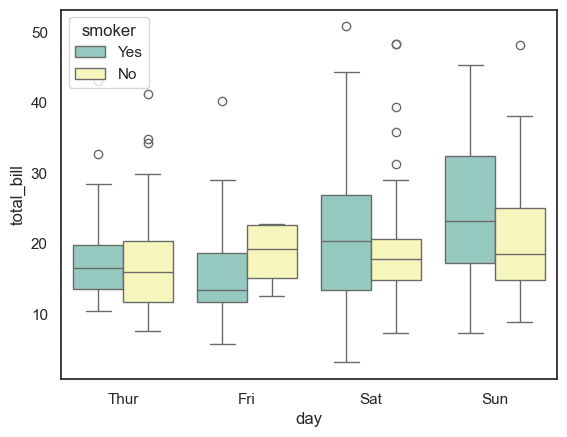

In [32]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")